## 以下代码均为练习使用，代码参考知乎专栏《玉树兰芝》
[玉树兰芝](https://zhuanlan.zhihu.com/p/37115099)

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from plotnine import *
from mizani.breaks import date_breaks

In [2]:
appcode = '57c9cadbccc14aad8c09bcd120fbf376'

In [3]:
def get_weather(areacode, areaname_dict, month, appcode):
    ## 所有数据均来自下方网址， 阿里云
    url = 'https://ali-weather.showapi.com/weatherhistory'
    payload = {'areaCode': areacode, 'month': month}
    
    ## 这一步本来是要写成 headers = {'Authorization' : 'APPCODE' + appcode} 但是运行之后出现错误所以改成下方code
    headers = {'Authorization': 'APPCODE {}'.format(appcode)}

    r = requests.get(url, params=payload, headers=headers)

    content_json = json.loads(r.content)

    data = pd.DataFrame(content_json['showapi_res_body']['list'])
    
    ## 这一行我们想要城市的名称
    data['areaname'] = areaname_dict[areacode]

    return data

<b>下面这个方法是为了让我们可以更加方便的定义多个城市，不然的话只用上方一个方法会很累</b>

In [4]:
def get_area(areaname_dict, months, appcode):
    data = []
    for areacode in areaname_dict:
        data_times = []
        for month in months:
            tmp_data = get_weather(areacode, areaname_dict, month, appcode)
            data_times.append(tmp_data)
        area_data = pd.concat(data_times)
        data.append(area_data)
    return data

In [5]:
areaname_dict = {"410100":"ZhengZhou", "310000":"ShangHai", "110000":"LiJiang"}
months = ["202001","202002","202003"]

In [6]:
weather = get_area(areaname_dict, months, appcode)

In [7]:
weather

[   aqiLevel min_temperature      time wind_direction wind_power  aqi weather  \
 0         2               0  20200101            东南风         1级   72      多云   
 1         3              -1  20200102            东南风         1级  120      多云   
 2         4              -2  20200103            东南风         1级  183    阴-多云   
 3         5               1  20200104            东南风         2级  242   多云-中雨   
 4         5               0  20200105            东北风         3级  274     雨夹雪   
 ..      ...             ...       ...            ...        ...  ...     ...   
 26        1               3  20200327            东北风         3级   41    阴-多云   
 27        1               7  20200328            东南风         2级   47    多云-阴   
 28        1               4  20200329            西南风         2级   44   小雨-多云   
 29        2               8  20200330            东南风         2级   54    晴-多云   
 30        2               5  20200331            东南风         2级   73    阴-多云   
 
    max_temperature aqiInf

In [8]:
df = pd.concat(weather)
df

,aqiLevel,min_temperature,time,wind_direction,wind_power,aqi,weather,max_temperature,aqiInfo,areaname
0,2,0,20200101,东南风,1级,72,多云,5,良,ZhengZhou
1,3,-1,20200102,东南风,1级,120,多云,7,轻度污染,ZhengZhou
2,4,-2,20200103,东南风,1级,183,阴-多云,10,中度污染,ZhengZhou
3,5,1,20200104,东南风,2级,242,多云-中雨,11,重度污染,ZhengZhou
4,5,0,20200105,东北风,3级,274,雨夹雪,2,重度污染,ZhengZhou
...,...,...,...,...,...,...,...,...,...,...
26,1,-1,20200327,西北风,3级,27,晴,13,优,LiJiang
27,1,2,20200328,西南风,2级,30,晴,14,优,LiJiang
28,2,5,20200329,西南风,2级,62,多云,16,良,LiJiang
29,2,7,20200330,西南风,2级,87,阴-多云,18,良,LiJiang


In [9]:
df.dtypes

aqiLevel           object
min_temperature    object
time               object
wind_direction     object
wind_power         object
aqi                object
weather            object
max_temperature    object
aqiInfo            object
areaname           object
dtype: object

In [10]:
df.time = pd.to_datetime(df.time)

In [11]:
df.aqi = pd.to_numeric(df.aqi)

findfont: Font family ['Bold'] not found. Falling back to DejaVu Sans.
/Users/yanyu/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
/Users/yanyu/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26399 missing from current font.
/Users/yanyu/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26085 missing from current font.
/Users/yanyu/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26399 missing from current font.


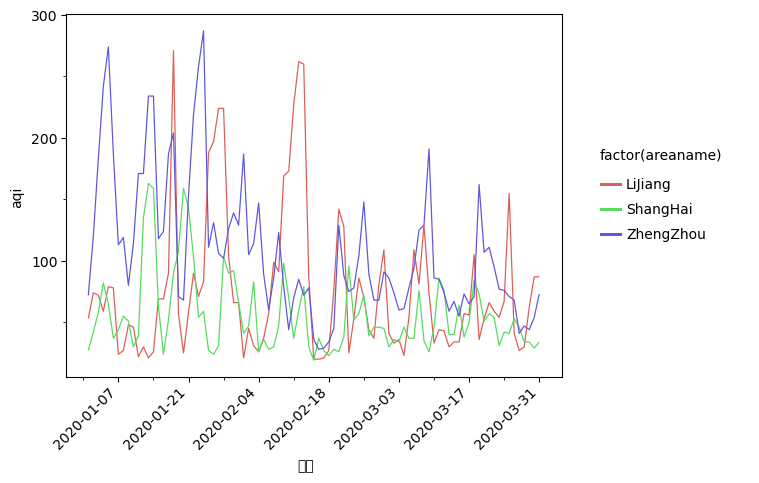

<ggplot: (8772895142132)>

In [12]:
(ggplot(df, aes(x='time', y='aqi', color='factor(areaname)')) + geom_line() +
 scale_x_datetime(breaks=date_breaks('2 weeks')) +
 xlab('日期') +
 theme_matplotlib() +
 theme(axis_text_x=element_text(rotation=45, hjust=1)) +
 theme(text=element_text(family='Bold'))
 )


In [13]:
#areacode = {'410100','310000','110000'}

In [14]:
#month = ['202001','202002','202103']

In [15]:
#url = 'https://ali-weather.showapi.com/weatherhistory'

In [16]:
#payload = {'areaCode':areacode, 'month':month}

In [17]:
#headers = {'Authorization': 'APPCODE ' + appcode}

In [18]:
#res = requests.get(url, params = payload, headers = headers)

In [19]:
#res

In [20]:
#res.content

In [21]:
#content_json = json.loads(res.content)

In [22]:
#content_json

In [23]:
#content_json['showapi_res_body']['list']

In [24]:
#data = pd.DataFrame(content_json['showapi_res_body']['list'])

In [25]:
#data.shape